In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score


In [7]:
import seaborn as sns

In [8]:
#Laod the Iris dataset
df = sns.load_dataset("iris")

In [9]:
df.shape #row and column

(150, 5)

In [10]:
#basic Data Exploration
print("\nBasic Information about Dataset:")
print(df.info()) #overview of dataset


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

<Figure size 1200x800 with 0 Axes>

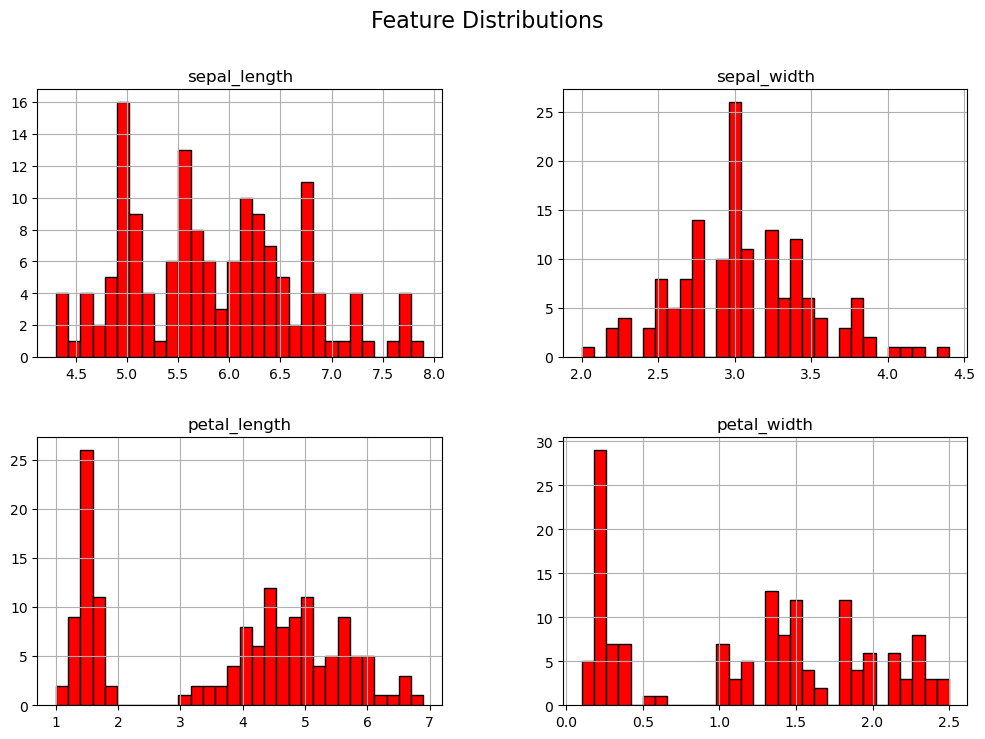

In [15]:
# Histograms for distribution of features
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30,color='r',edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

####<b><u> Inferences from Histograms: </b></u>
1.**Sepal Length**:
 -The distribution of sepal length appears to be roughly normal with a slight skew towards the right.
 -Most of the sepal lengths fail between 4.5 and 7.5cm.

2. **Sepal width**
 -The distribution of sepal width is also roughly normal but with a slight skew towards the left.
  - Most of the sepal widths fall between 2.5 and 3.5cm.
   
3. **Petal Legth**:
    -The distribution of petal length is more spread out and shpows a clear separation between different species.
   -There are distinct peaks indicating the presence of different species with varuing petal lengths.

4. **Petal Width**:
    - Similar to petal length, the distribution of petal with shows clear separation between species.
    -  -There are distinct peaks indicating the presence of diifferent species with varying petal widths.
      

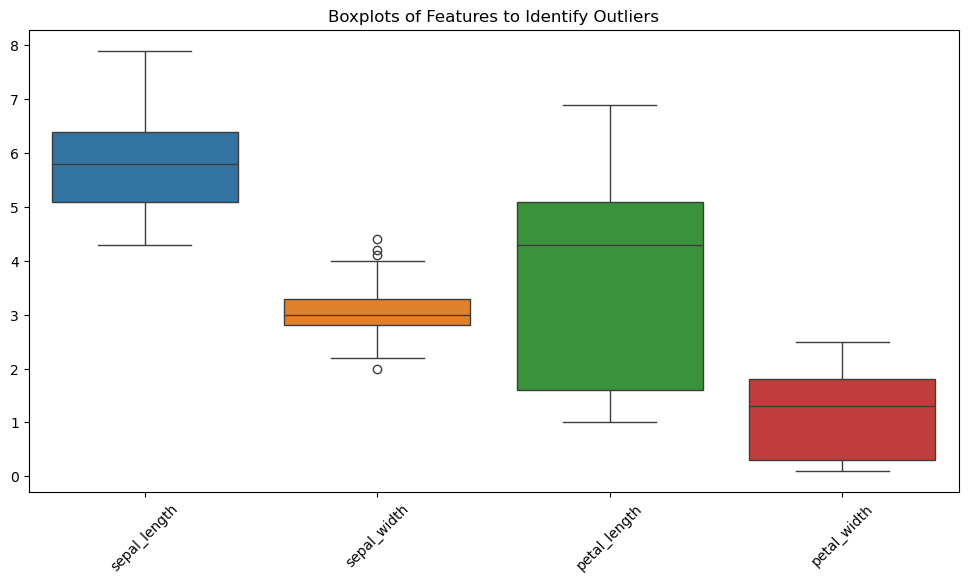

In [16]:
#Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features to Identify Outliers")
plt.show()

<b> Inference from boxplots: <b>

1. **Sepal Length**:
   - There are a few outliers in the sepal length distribution.
   - The median sepal length is around 5.8 cm, with the interquatile range (IQR) between 5.1 and 6.4 cm.

2. **sepal width**:
   - There are several outliers in the sepal width distibution.
   - The median sepal width is around 3.0 cm, with the IQR between 2.8and 3.3 cm.

3. **petal Length**:
   - The petal length distribution shows clear separation between species, with minimal overlap.
   - The median petal length varies significantly between species, indicating it is a good feature for classification.
4. **petal width**:
   - Similer to petal length, the petal with distribution shows clear separtion between species.
   - The median petal width varies significatly between species,indicating it is also a good feture for classfication 

In [17]:
num_col = df.select_dtypes(include=[np.number]).columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"numerical_data {num_col}")
print(f"categorical_data {cat_col}")

numerical_data Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
categorical_data Index(['species'], dtype='object')


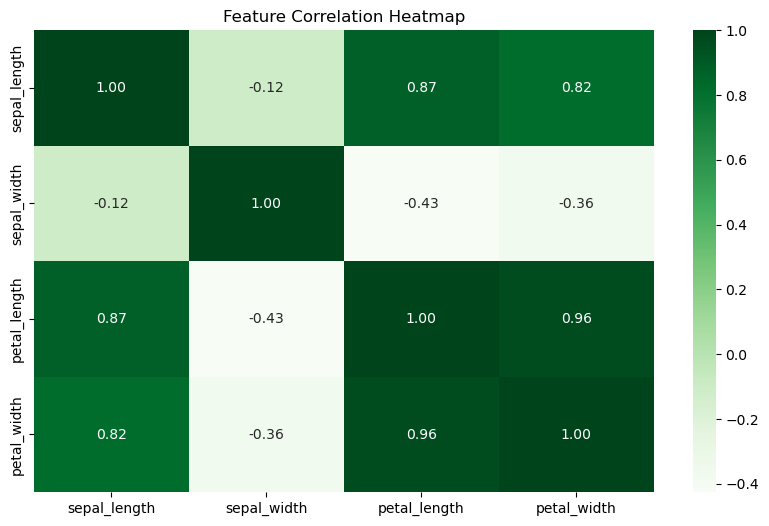

In [18]:
#correlation Matrix
num = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
corr_matrix = df[num].corr('pearson')
sns.heatmap(corr_matrix,annot=True,cmap='Greens', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
            

<b> Based on the heatmap of the correation matrix,we can infer the following:</b>

1. **sepal length**:
   - Positively correlated with petal length (0.87) and petal width(0.82).
   - weak negative correlation with sepal width(-0.12).
     
2. **sepal width**:
   - weak negative correlation with sepal length (-0.12),petal length(-0.43),and petal width(-0.37).
  
3. **petal length**:
   - strong positive correlation with sepal length (-0.12),and petal width (0.96).
   - weak negative correlation with sepal width(-0.43).
4. **petal width:**:
   - strong positive correlation with petal length (-0.96), and petal width (0.82).
   - weat negative correlation with sepal width(-0.37
5).

In [19]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [20]:
#encode target Labels
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"]) # 

In [21]:
df.species.value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [22]:
#Define features and target
x = df.drop(columns=["species"]) # All features except species
y = df["species"] # Target feature

In [23]:
#split in to training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [24]:
x_train.shape

(119, 4)

In [25]:
x_test.shape

(30, 4)

In [26]:
#function to evaluate k-nn for different values of k
def evaluate_knn(k_values,weights='uniform'):
    results = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k,
                                   weights=weights)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,
                      average='weighted')
        results[k] = {'accuracy': accuracy,
                      'f1_score':f1}
        return results

In [27]:
#TEst for k= 3, 5 7
k_values = [3,5,7]
regular_knn_results=evaluate_knn(k_values,
                                   weights='uniform')
weighted_knn_results=evaluate_knn(k_values,
                                    weights='distance')


In [28]:
#convert results to DataFrame for comparison
results_df = pd.DataFrame.from_dict({
    'Regular k-NN':regular_knn_results,
    'weighted k-NN':weighted_knn_results
}, orient='index').T
results_df

,Regular k-NN,weighted k-NN
3,"{'accuracy': 1.0, 'f1_score': 1.0}","{'accuracy': 1.0, 'f1_score': 1.0}"
